<a href="https://www.kaggle.com/code/sharanharsoor/tutorial-word-sense-disambiguation?scriptVersionId=122396871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
In natural language processing, word sense disambiguation (WSD) is the problem of determining which "sense" (meaning) of a word is activated by the use of the word in a particular context, a process which appears to be largely unconscious in people. WSD is a natural classification problem: Given a word and its possible senses, as defined by a dictionary, classify an occurrence of the word in context into one or more of its sense classes. The features of the context (such as neighboring words) provide the evidence for classification. <cr>
    
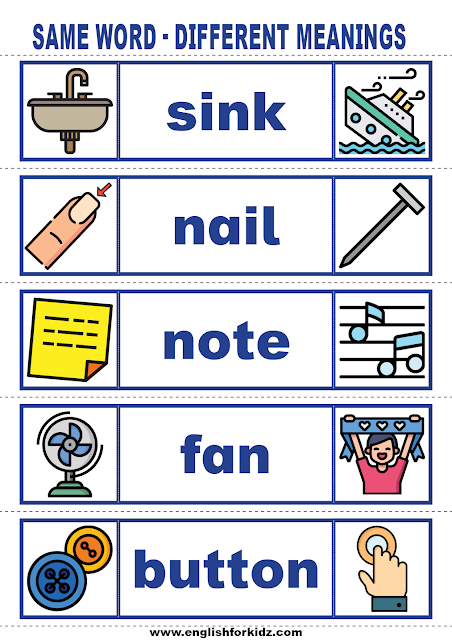

In [1]:
from nltk import wsd
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
import warnings

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


In [2]:
# in the below example the word die has a different meanings in each sentence. 
# only by understanding the context the of the word the NLP can further improvise.

X = 'The die is cast.'
Y = 'Roll the die to get a 6.'
Z = 'What is dead may never die.'

In [3]:
# in this we will use wordnet from princeton university to get the word different context sentences with part of speech attached. 
# Wordnet : WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of 
# cognitive synonyms (synsets), each expressing a distinct concept
# In python wordnet data is loaded with NLTK. in the

# in the below will pass word die to wordnet and try to get the different unqiue sentences that wordnet have for die
# output : wordnet gave many different definations of die that include Verbs and nouns

wn.synsets("die")

[Synset('die.n.01'),
 Synset('die.n.02'),
 Synset('die.n.03'),
 Synset('die.v.01'),
 Synset('die.v.02'),
 Synset('die.v.03'),
 Synset('fail.v.04'),
 Synset('die.v.05'),
 Synset('die.v.06'),
 Synset('die.v.07'),
 Synset('die.v.08'),
 Synset('die.v.09'),
 Synset('die.v.10'),
 Synset('die.v.11')]

In [4]:
# check noun related details 
wn.synsets('die', pos=wn.NOUN)

[Synset('die.n.01'), Synset('die.n.02'), Synset('die.n.03')]

In [5]:
# print all the definations of nouns
i =0
for syn in wn.synsets('die', pos=wn.NOUN):
    print("defination {0} : {1}".format(i, syn.definition()))
    i+=1

defination 0 : a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers
defination 1 : a device used for shaping metal
defination 2 : a cutting tool that is fitted into a diestock and used for cutting male (external) screw threads on screws or bolts or pipes or rods


In [6]:
# print all the definations of verbs
i =0
for syn in wn.synsets('die', pos=wn.VERB):
    print("defination {0} : {1}".format(i, syn.definition()))
    i+=1

defination 0 : pass from physical life and lose all bodily attributes and functions necessary to sustain life
defination 1 : suffer or face the pain of death
defination 2 : be brought to or as if to the point of death by an intense emotion such as embarrassment, amusement, or shame
defination 3 : stop operating or functioning
defination 4 : feel indifferent towards
defination 5 : languish as with love or desire
defination 6 : cut or shape with a die
defination 7 : to be on base at the end of an inning, of a player
defination 8 : lose sparkle or bouquet
defination 9 : disappear or come to an end
defination 10 : suffer spiritual death; be damned (in the religious sense)


# Word-Sense Disambiguation with Lesk Algorithm

In [7]:
# input the sentence X i.e 'The die is cast.' and check if lesk is able to find the correct similar sentence.
print(X)
print(wsd.lesk(X.split(), 'die'))
print(wsd.lesk(X.split(), 'die').definition())

The die is cast.
Synset('die.v.07')
cut or shape with a die


For the input sentence X,lesk have found a similar matching sentence the type of that is verb, and which is not correct. In the next will explicitly pass the part of speech (POS) and check the output

In [8]:
# with passing a POS we got the correct defiantion.
print(X)
wsd.lesk(X.split(), 'die', pos=wn.NOUN).definition()

The die is cast.


'a cutting tool that is fitted into a diestock and used for cutting male (external) screw threads on screws or bolts or pipes or rods'

In [9]:
# for sentence X i.e 'Roll the die to get a 6.' is again a noun. 
print(Y)
wsd.lesk(Y.split(), 'die').definition()

Roll the die to get a 6.


'to be on base at the end of an inning, of a player'

with not passing the type, wordnet again gave a wrong defination. let's try with passing the correct defination.

In [10]:
# with passing a POS we got the correct defiantion.

wsd.lesk(Y.split(), 'die', pos=wn.NOUN).definition()

'a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers'

In [11]:
# Similar observations with sentance Z
print(Z)
wsd.lesk(Z.split(), 'die').definition()

What is dead may never die.


'a cutting tool that is fitted into a diestock and used for cutting male (external) screw threads on screws or bolts or pipes or rods'

In [12]:
wsd.lesk(Z.split(), 'die', pos=wn.VERB).definition()

'stop operating or functioning'

in the next will implement automatic POS finiding and correct defination using lesk. Before that will check little about POS tagging using spicy.

# POS Tagging 

In [13]:
# passing a sentance to spacy for automatic find of POS tag.
# from the output it's evident that the way POS is found for a sentence.

sent1 = "I loved the screen on this phone."
doc1 = nlp(sent1)
for tok in doc1:
    print(tok.text,tok.pos_)

I PRON
loved VERB
the DET
screen NOUN
on ADP
this DET
phone NOUN
. PUNCT


In [14]:
# another example
sent2 = "The battery life on this phone is great. !"
doc2 = nlp(sent2)
for tok in doc2:
    print(tok.text,tok.pos_)

The DET
battery NOUN
life NOUN
on ADP
this DET
phone NOUN
is AUX
great ADJ
. PUNCT
! PUNCT


In [15]:
# reading the POS tagging and lemma both (just extending an example to show the lemma)

sent1 = "I loved the screen on this phone."
doc1 = nlp(sent1)
pos = []
lemma = []
text = []
for tok in doc1:
    pos.append(tok.pos_)
    lemma.append(tok.lemma_)
    text.append(tok.text)
nlp_table = pd.DataFrame({'text':text,'lemma':lemma,'pos':pos})
nlp_table.head()

,text,lemma,pos
0,I,I,PRON
1,loved,love,VERB
2,the,the,DET
3,screen,screen,NOUN
4,on,on,ADP


# Automatic POS Tagging + Lesk with spaCy

In [16]:
POS_MAP = {
    'VERB': wn.VERB,
    'NOUN': wn.NOUN,
    'PROPN': wn.NOUN
}


def lesk(doc, word):
    found = False
    for token in doc:
        if token.text == word:
            word = token
            found = True
            break
    if not found:
        raise ValueError(f'Word \"{word}\" does not appear in the document: {doc.text}.')
    pos = POS_MAP.get(word.pos_, False)
    if not pos:
        warnings.warn(f'POS tag for {word.text} not found in wordnet. Falling back to default Lesk behaviour.')
    args = [c.text for c in doc], word.text
    kwargs = dict(pos=pos)
    return wsd.lesk(*args, **kwargs)

In [17]:
doc = nlp('Roll the die to get a 6.')
lesk(doc, 'die')

Synset('die.n.01')

In [18]:
# with finding POS tag by default, this helping lesk to find the correct defination.

lesk(doc, 'die').definition()

'a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers'

In [19]:
# check google as company.

lesk(nlp('I work at google.'), 'google').definition()

"a widely used search engine that uses text-matching techniques to find web pages that are important and relevant to a user's search"

In [20]:
# check google as a verb (search engine)

lesk(nlp('I will google it.'), 'google').definition()

'search the internet (for information) using the Google search engine'

In [21]:
# hope as a noun 

lesk(nlp('Her pep talk gave me hope'), 'hope').definition()

'grounds for feeling hopeful about the future'

In [22]:
# hope as a veb

lesk(nlp('I hope we win!'), 'hope').definition()

'intend with some possibility of fulfilment'

with above observations it's clear that wordnet with lesk is working as expected.

# END